# Task 4 Sign Language Classification


In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d datamunge/sign-language-mnist

 85% 53.0M/62.6M [00:00<00:00, 121MB/s]
100% 62.6M/62.6M [00:00<00:00, 125MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/sign-language-mnist.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score

In [5]:
df_train=pd.read_csv('/content/sign_mnist_train/sign_mnist_train.csv')
df_test=pd.read_csv('/content/sign_mnist_test/sign_mnist_test.csv')

In [6]:
train_label = df_train["label"]
test_label = df_test["label"]

<Axes: >

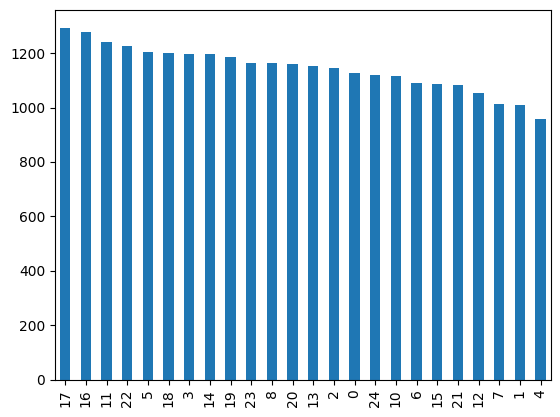

In [7]:
df_train['label'].value_counts().plot(kind='bar')

In [8]:
df_train=df_train.iloc[:,1:]

In [9]:
df_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,189,189,190,190,192,193,193,193,193,194,...,132,165,99,77,52,200,234,200,222,225
27451,151,154,157,158,160,161,163,164,166,167,...,198,198,198,198,198,196,195,195,195,194
27452,174,174,174,174,174,175,175,174,173,173,...,121,196,209,208,206,204,203,202,200,200
27453,177,181,184,185,187,189,190,191,191,190,...,119,56,27,58,102,79,47,64,87,93


In [10]:
df_test=df_test.iloc[:,1:]

In [11]:
df_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,135,119,108,102,105,99,61,103,121,133,...,108,112,116,114,118,180,184,176,167,163
7168,157,159,161,164,166,166,171,174,175,176,...,213,213,213,214,213,211,210,210,209,208
7169,190,191,190,191,190,190,192,192,191,192,...,216,215,213,214,214,213,210,211,209,208
7170,201,205,208,209,214,216,218,223,226,229,...,112,169,255,255,237,113,91,67,70,63


In [12]:
x_train=df_train.values

In [13]:
x_train=x_train.reshape(-1,28,28,1)

In [14]:
x_train.shape

(27455, 28, 28, 1)

In [15]:
x_train

array([[[[107],
         [118],
         [127],
         ...,
         [170],
         [170],
         [169]],

        [[111],
         [121],
         [129],
         ...,
         [171],
         [171],
         [170]],

        [[113],
         [123],
         [131],
         ...,
         [171],
         [171],
         [171]],

        ...,

        [[142],
         [150],
         [159],
         ...,
         [202],
         [201],
         [200]],

        [[142],
         [151],
         [160],
         ...,
         [204],
         [203],
         [202]],

        [[142],
         [151],
         [160],
         ...,
         [204],
         [203],
         [202]]],


       [[[155],
         [157],
         [156],
         ...,
         [138],
         [ 92],
         [108]],

        [[158],
         [159],
         [159],
         ...,
         [142],
         [116],
         [143]],

        [[161],
         [161],
         [161],
         ...,
         [147],
         [

In [16]:
x_test = df_test.values

In [17]:
x_test = x_test.reshape(-1,28,28,1)

In [18]:
lb = LabelBinarizer()

In [19]:
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

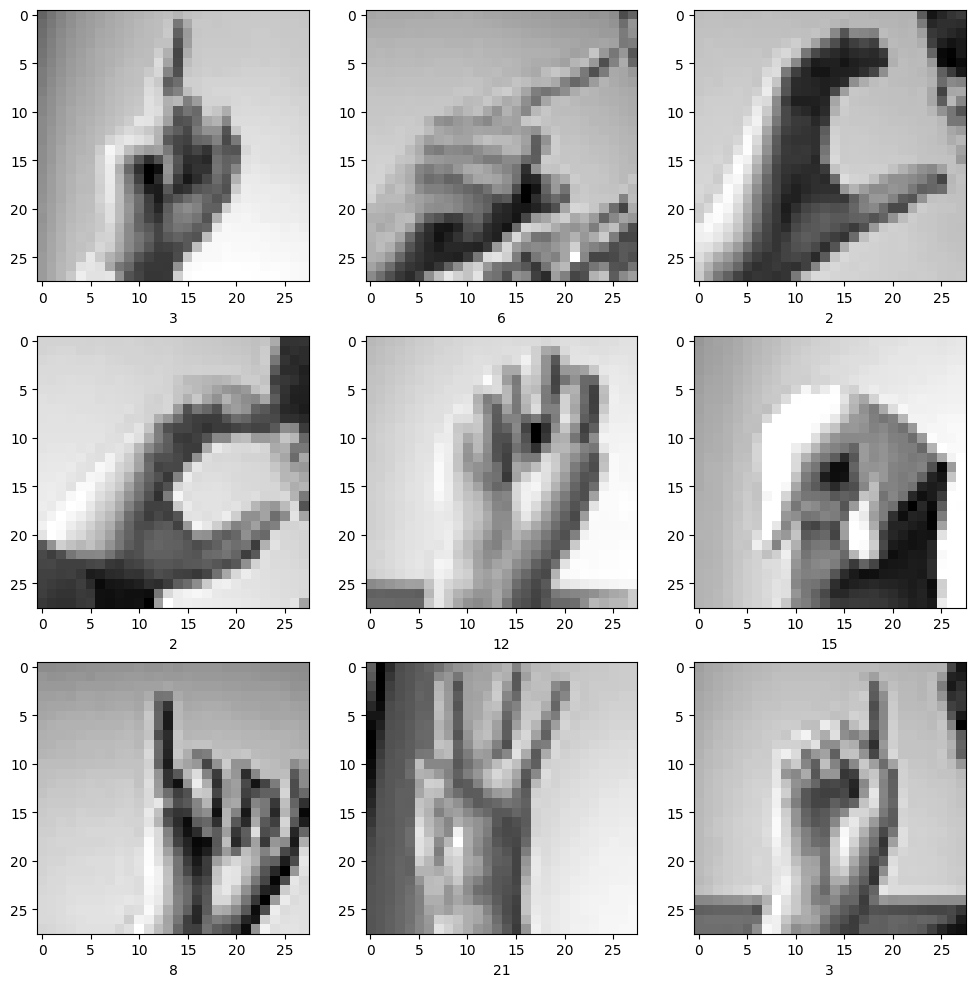

In [20]:
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.xlabel(np.argmax(y_train[i]))

plt.show()

In [21]:
train_generator = ImageDataGenerator(rescale=(1./255))

In [22]:
val_generator = ImageDataGenerator(rescale=(1./255))

In [23]:
from tensorflow.keras import Sequential
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',input_shape=(28,28,1),activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(24,activation="softmax"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [25]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [26]:
history = model.fit_generator(generator = train_generator.flow(x_train,y_train,batch_size=32),
                              validation_data = val_generator.flow(x_test,y_test),epochs=5,verbose=1)

Epoch 1/5


<ipython-input-26-4b38b6c82b37>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = train_generator.flow(x_train,y_train,batch_size=32),


858/858 [==============================] - 69s 78ms/step - loss: 0.6404 - accuracy: 0.8032 - val_loss: 0.2805 - val_accuracy: 0.9229
Epoch 2/5
858/858 [==============================] - 63s 73ms/step - loss: 0.0198 - accuracy: 0.9945 - val_loss: 0.2131 - val_accuracy: 0.9484
Epoch 3/5
858/858 [==============================] - 63s 73ms/step - loss: 3.3868e-04 - accuracy: 1.0000 - val_loss: 0.1982 - val_accuracy: 0.9552
Epoch 4/5
858/858 [==============================] - 63s 73ms/step - loss: 1.3135e-04 - accuracy: 1.0000 - val_loss: 0.2089 - val_accuracy: 0.9575
Epoch 5/5
858/858 [==============================] - 60s 70ms/step - loss: 7.2337e-05 - accuracy: 1.0000 - val_loss: 0.2198 - val_accuracy: 0.9565


In [27]:
predict_x=model.predict(x_test)
x_pred=np.argmax(predict_x,axis=1)

225/225 [==============================] - 5s 21ms/step


In [28]:
y_test = np.argmax(y_test,axis=1)

In [29]:
x=accuracy_score(y_test,x_pred)
x=x*100
x

93.01450083658672